In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Reading trainingData from excel file provided on blackboard with pandas and changing it to numpy array
X_train = pd.read_excel(r'TrainingData.xls', header=None).to_numpy()
print(X_train, "\n\n" ,X_train.shape)


[[-0.2  0.1  0.3 -0.4]
 [ 0.6 -0.1  0.7 -0.5]
 [ 0.8  0.1 -0.6  0. ]] 

 (3, 4)


In [3]:
x1 = X_train[0]
x2 = X_train[1]
x3 = X_train[2]

x1, x2, x3

(array([-0.2,  0.1,  0.3, -0.4]),
 array([ 0.6, -0.1,  0.7, -0.5]),
 array([ 0.8,  0.1, -0.6,  0. ]))

In [4]:
y_train = pd.read_excel(r'TrainingData.xls', header=None, sheet_name='TargetOutputs').to_numpy()
print(y_train, "\n\n", y_train.shape)

[[0.4 0.6 0.5 0.7]
 [0.1 0.3 0.2 0.9]
 [0.7 0.1 0.2 0.1]] 

 (3, 4)


In [5]:
y1 = y_train[0]
y2 = y_train[1]
y3 = y_train[2]

y1, y2, y3

(array([0.4, 0.6, 0.5, 0.7]),
 array([0.1, 0.3, 0.2, 0.9]),
 array([0.7, 0.1, 0.2, 0.1]))

In [6]:
class NeuralNetwork(object):
    def __init__(self):
        #parameters
        #number of neurons and layers for the network
        self.inputLayer = 4 #defining the nodes in input layer
        self.hiddenLayer = 5 #defining the nodes in hidden layer
        self.outputLayer = 4 #defining the nodes in output layer
        self.epoch = 50 #how many time you want the train to iterate
        self.lr = 0.01
        
        #weights
        np.random.seed(42)
        self.W1 = np.random.random(size=(self.inputLayer, self.hiddenLayer)) # (4x5) weight matrix from input to hidden layer
        self.W2 = np.random.random(size=(self.hiddenLayer, self.outputLayer)) # (5x4) weight matrix from hidden to output layer
        
        
    def activate(self, summation, SigmoidDeriv=False):
        #Sigmoid Activation #SigmoidDeriv by default is set to False
        if (SigmoidDeriv == True): #but if it becomes true
            return summation * (1 - summation) #Used for back-error propagation for hidden and output layers
        return 1/(1 + np.exp(-summation)) #Calculating sigmoid
    
    def feedForward(self, X, y):
        self.x = np.dot(X, self.W1) #input times weight 1 
        print("\nLayer 0 weights times inputs:\n", self.x)
        self.a1 = self.activate(self.x) #activated input
        print("\nLayer 0 output activation\n", self.a1)
        self.a2 = np.dot(self.a1, self.W2) #activated input times weight 2
        print("\nLayer 1 weights times inputs:\n", self.a2)
        self.predicted = self.activate(self.a2) #activated output
        print("\nLayer 0 output activation\n", self.predicted)
        
        return self.predicted
        
    def feedBackward(self, X, y, predicted):
        
        print("\n____________________________\n")
        print("--- Backward Propagation ---")
        print("\n____________________________\n")
        
        delta_output = (y - predicted) * self.activate(predicted, SigmoidDeriv=True)
        print("\n Output layer error dZ:\n", delta_output)
        
        print("\nLayer 2 steps")
        layer2_w = []
        for i in range(len(self.a1)):
            layer2_w.append(self.a1[i]*delta_output)
        layer2_w = np.array(layer2_w)
        print("Dwij:\n", layer2_w)
        
        deltanew = self.lr*layer2_w
        print("weight update gradient:\n",deltanew)
        
        
        
        ###########################
        
        delta_hidden = (np.dot(delta_output, self.W2.T)) * self.activate(self.a1, SigmoidDeriv=True)
        print("\n Estimate error dZ for layer 1\n", delta_hidden)
        
        
        print("layer 1 steps")
        layer1_w = []
        for i in range(len(X)):
            layer1_w.append(X[i]*delta_hidden)
        layer1_w = np.array(layer1_w)
        print("weight update gradient:\n", layer1_w)
        
        print("\n\n Updated Weight Matrices")  
        
        self.W1 = self.W1 + (layer1_w)
        print("\nLayer 1 weights\n", self.W1)
        
        self.W2 = self.W2 + deltanew
        print("\nLayer 2 weights\n", self.W2)

        
    def train(self, X, y):
        #losses
        predicted = self.feedForward(X, y)
        self.feedBackward(X, y, predicted)
    
        
        #losses.append(np.sqrt((np.sum(np.sum(np.square(y - predicted)))/3*4)))
        #return np.array(losses)
        

In [7]:
NN = NeuralNetwork()

In [8]:
print("Initial Weight Matrices")
print("\nLayer 1 weights\n", NN.W1)
print("\nLayer 2 weights\n", NN.W2)
print("\n\n")
losses = []
for i in range(NN.epoch):
    for j in range(len(X_train)):
        print("******************************")
        print(f'***** EPOCH {i+1} / SAMPLE {j+1} *****')
        print("******************************")
        NN.train(X_train[j], y_train[j])
    losses.append(np.mean(np.square(y_train - NN.feedForward(X_train, y_train))))
    
        

Initial Weight Matrices

Layer 1 weights
 [[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]
 [0.15599452 0.05808361 0.86617615 0.60111501 0.70807258]
 [0.02058449 0.96990985 0.83244264 0.21233911 0.18182497]
 [0.18340451 0.30424224 0.52475643 0.43194502 0.29122914]]

Layer 2 weights
 [[0.61185289 0.13949386 0.29214465 0.36636184]
 [0.45606998 0.78517596 0.19967378 0.51423444]
 [0.59241457 0.04645041 0.60754485 0.17052412]
 [0.06505159 0.94888554 0.96563203 0.80839735]
 [0.30461377 0.09767211 0.68423303 0.44015249]]



******************************
***** EPOCH 1 / SAMPLE 1 *****
******************************

Layer 0 weights times inputs:
 [-0.12649503 -0.01505844 -0.01995095 -0.16869647 -0.02234064]

Layer 0 output activation
 [0.46841834 0.49623546 0.49501243 0.45792562 0.49441507]

Layer 1 weights times inputs:
 [0.98656822 0.96077673 1.31715614 1.09900741]

Layer 0 output activation
 [0.72840955 0.72327729 0.78870817 0.75007408]

____________________________

--- Backward 


Layer 0 weights times inputs:
 [-0.37509313 -1.1896949  -0.45004989 -1.77930096 -0.94480282]

Layer 0 output activation
 [0.40731092 0.23331351 0.3893489  0.14438947 0.27993122]

Layer 1 weights times inputs:
 [0.63301619 0.36615298 0.67142087 0.55227068]

Layer 0 output activation
 [0.65317306 0.59052908 0.66182124 0.63466225]

____________________________

--- Backward Propagation ---

____________________________


 Output layer error dZ:
 [ 0.01060808 -0.11861213 -0.10336201 -0.12397004]

Layer 2 steps
Dwij:
 [[ 0.00432079 -0.04831202 -0.04210047 -0.05049435]
 [ 0.00247501 -0.02767381 -0.02411575 -0.02892388]
 [ 0.00413025 -0.0461815  -0.04024388 -0.0482676 ]
 [ 0.0015317  -0.01712634 -0.01492439 -0.01789997]
 [ 0.00296953 -0.03320324 -0.02893425 -0.03470308]]
weight update gradient:
 [[ 4.32078767e-05 -4.83120161e-04 -4.21004738e-04 -5.04943503e-04]
 [ 2.47500885e-05 -2.76738123e-04 -2.41157523e-04 -2.89238845e-04]
 [ 4.13024516e-05 -4.61815034e-04 -4.02438840e-04 -4.82675988e-04

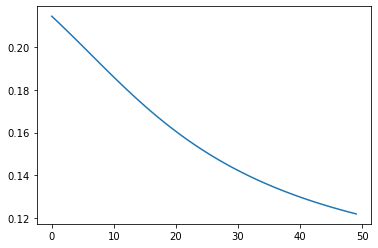

In [9]:
plt.plot(losses)

In [10]:
X_test = pd.read_excel(r'TrainingData.xls', header=None, sheet_name='TestingData').to_numpy()
print(X_test, "\n\n", X_test.shape)

[[-0.3  0.2  0.4 -0.3]
 [ 0.4 -0.2  0.8 -0.3]
 [ 0.6  0.3 -0.7  0. ]] 

 (3, 4)


In [11]:
y_test = pd.read_excel(r'TrainingData.xls', header=None, sheet_name='TestingOutput').to_numpy()
print(y_train, "\n\n", y_train.shape)

[[0.4 0.6 0.5 0.7]
 [0.1 0.3 0.2 0.9]
 [0.7 0.1 0.2 0.1]] 

 (3, 4)


In [12]:
print("Initial Weight Matrices")
print("\nLayer 1 weights\n", NN.W1)
print("\nLayer 2 weights\n", NN.W2)
print("\n\n")
losses = []
for i in range(NN.epoch):
    for j in range(len(X_train)):
        print("******************************")
        print(f'***** EPOCH {i+1} / SAMPLE {j+1} *****')
        print("******************************")
        NN.train(X_train[j], y_train[j])
    losses.append(np.mean(np.square(y_train - NN.feedForward(X_test, y_test))))
    
        

Initial Weight Matrices

Layer 1 weights
 [[-0.92201891 -1.11649883 -0.72602461 -2.26130441 -1.43743063]
 [ 0.08950335 -0.06930717  0.82999327  0.37078551  0.5917491 ]
 [-0.3130357   0.95082421  0.17228285  0.57873337  0.15740651]
 [ 0.98488936  1.23082444  1.56078601  1.5301963   1.05407772]]

Layer 2 weights
 [[ 0.57634973  0.09129605  0.24010862  0.34242276]
 [ 0.40604917  0.73615573  0.14296393  0.50216537]
 [ 0.55167966 -0.00374525  0.55245767  0.14938622]
 [ 0.03054557  0.91345311  0.92472603  0.79458157]
 [ 0.26867267  0.05610458  0.63747558  0.42202491]]



******************************
***** EPOCH 1 / SAMPLE 1 *****
******************************

Layer 0 weights times inputs:
 [-0.29451234  0.00928654 -0.3444253   0.05088092 -0.0277481 ]

Layer 0 output activation
 [0.42689953 0.50232162 0.41473492 0.51271749 0.49306342]

Layer 1 weights times inputs:
 [0.82694544 0.90321439 1.19187871 1.07586523]

Layer 0 output activation
 [0.69570867 0.71160961 0.7670769  0.74571072]

___


Layer 0 weights times inputs:
 [-0.70492177 -1.73431154 -0.74669605 -2.40981461 -1.41974516]

Layer 0 output activation
 [0.33072191 0.15003692 0.32154164 0.08242734 0.19470154]

Layer 1 weights times inputs:
 [0.47542358 0.21627911 0.467192   0.38072377]

Layer 0 output activation
 [0.61666664 0.55385999 0.61471892 0.59404766]

____________________________

--- Backward Propagation ---

____________________________


 Output layer error dZ:
 [ 0.01969908 -0.1121484  -0.09822185 -0.11914208]

Layer 2 steps
Dwij:
 [[ 0.00651492 -0.03708993 -0.03248412 -0.0394029 ]
 [ 0.00295559 -0.0168264  -0.0147369  -0.01787571]
 [ 0.00633407 -0.03606038 -0.03158242 -0.03830914]
 [ 0.00162374 -0.00924409 -0.00809617 -0.00982056]
 [ 0.00383544 -0.02183547 -0.01912395 -0.02319715]]
weight update gradient:
 [[ 6.51491783e-05 -3.70899320e-04 -3.24841184e-04 -3.94028971e-04]
 [ 2.95558941e-05 -1.68263995e-04 -1.47369037e-04 -1.78757106e-04]
 [ 6.33407491e-05 -3.60603792e-04 -3.15824151e-04 -3.83091404e-04

 [[ 0.00711117 -0.02963669 -0.02565765 -0.03156242]
 [ 0.00274209 -0.01142801 -0.00989368 -0.01217059]
 [ 0.00708348 -0.02952131 -0.02555776 -0.03143955]
 [ 0.00145922 -0.00608147 -0.00526497 -0.00647663]
 [ 0.00370396 -0.01543674 -0.01336419 -0.01643979]]
weight update gradient:
 [[ 7.11116640e-05 -2.96366870e-04 -2.56576456e-04 -3.15624245e-04]
 [ 2.74209158e-05 -1.14280141e-04 -9.89368129e-05 -1.21705855e-04]
 [ 7.08348273e-05 -2.95213117e-04 -2.55577607e-04 -3.14395524e-04]
 [ 1.45921663e-05 -6.08147020e-05 -5.26496795e-05 -6.47663298e-05]
 [ 3.70396423e-05 -1.54367402e-04 -1.33641932e-04 -1.64397913e-04]]

 Estimate error dZ for layer 1
 [-0.00993005 -0.01284784 -0.00942422 -0.01449253 -0.01254587]
layer 1 steps
weight update gradient:
 [[-0.00794404 -0.01027828 -0.00753937 -0.01159402 -0.0100367 ]
 [-0.000993   -0.00128478 -0.00094242 -0.00144925 -0.00125459]
 [ 0.00595803  0.00770871  0.00565453  0.00869552  0.00752752]
 [-0.         -0.         -0.         -0.         -0.      


Layer 0 weights times inputs:
 [[-0.13755758  0.38065476 -0.12402398  0.60201171  0.37848102]
 [-1.4178531  -0.66299737 -1.51166762 -1.42816406 -1.28301382]
 [-0.63150628 -1.86231305 -0.53590334 -2.23705882 -1.29631689]]

Layer 0 output activation
 [[0.46566473 0.59403101 0.46903369 0.64611642 0.59350669]
 [0.19499837 0.34006662 0.18069178 0.19338491 0.21703764]
 [0.34716907 0.13443368 0.36914108 0.09647161 0.21478553]]

Layer 1 weights times inputs:
 [[0.88688133 1.04293758 1.35419852 1.27260161]
 [0.38898846 0.43188049 0.48021055 0.50235339]
 [0.49524229 0.20157334 0.49773079 0.39704965]]

Layer 0 output activation
 [[0.70824617 0.73941642 0.79481519 0.78118778]
 [0.59603917 0.60632262 0.61779759 0.62301223]
 [0.6213406  0.55022339 0.62192591 0.5979786 ]]


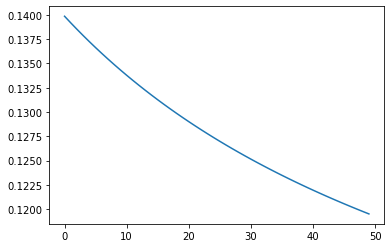

In [13]:
plt.plot(losses)